In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [3]:
plt.style.use('dark_background')

In [4]:
data_dir = "/home/scai/phd/aiz218323/tmp/XC/results/NGAME/STransformer"

# Code

In [5]:
def read_log_file(log_file):
    with open(log_file) as file:
        log_content = file.read()
    latest_log_content = log_content.split("Net:")[-1]
    return latest_log_content

def read_log_files(log_files):
    stats = []
    for log_file in log_files:
        latest_log_content = read_log_file(log_file)
        stat_dict, val_metrics = extract_training_info(latest_log_content)
        stats.append((stat_dict, val_metrics))
    return stats


In [6]:
def extract_epoch_lines(content):
    content = content.split('\n')
    pattern = re.compile(r'^\s*' + re.escape("Epoch: "))
    return [line for line in content if pattern.match(line)]

def extract_val_lines(content):
    content = content.split('\n')
    pattern = re.compile(r'^\s*' + re.escape("P@1 "))
    return [line for line in content if pattern.match(line)]

def extract_training_info(content):
    epoch_info = extract_epoch_lines(content)
    stat_dict = dict()
    for line in epoch_info:
        for stat in line.split(","):
            field, val = stat.strip().split(" ")[:2]
            field_val = stat_dict.setdefault(field[:-1], [])
            field_val.append(float(val))
            
    val_info = extract_val_lines(content)
    val_metrics = []
    for line in val_info:
        val_metric = line.split(" ")[3]
        val_metric = val_metric.split(",")[:-1]
        val_metric = list(map(float, val_metric))
        val_metrics.append(val_metric)
    val_metrics = np.array(val_metrics)
    
    return stat_dict, val_metrics


In [7]:
def plot_loss(fig, ax, stat_dict):
    ax[0].plot(stat_dict['Epoch'], stat_dict['loss'])
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("loss")
    ax[0].grid(linestyle='--', linewidth=1, color='grey', alpha=0.8)

    ax[1].plot(stat_dict['Epoch'], stat_dict['time'])
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("time")
    ax[1].grid(linestyle='--', linewidth=1, color='grey', alpha=0.8)
    

In [8]:
def plot_val(fig, ax, val_metrics):
    for i in range(val_metrics.shape[1]):
        r, c = i//3, i%3
        ax[r, c].plot(val_metrics[:, i], 'o-')
        ax[r, c].set_xlabel('epochs')
        ax[r, c].set_ylabel(f'P@{i+1}')
        ax[r, c].grid(linestyle='--', linewidth=1, color='grey', alpha=0.8)
    ax[1, 2].axis("off")
    

# Single

In [154]:
log_file = f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_0_100/siamese/log_train.txt"
latest_log_content = read_log_file(log_file)
stat_dict, val_metrics = extract_training_info(latest_log_content)

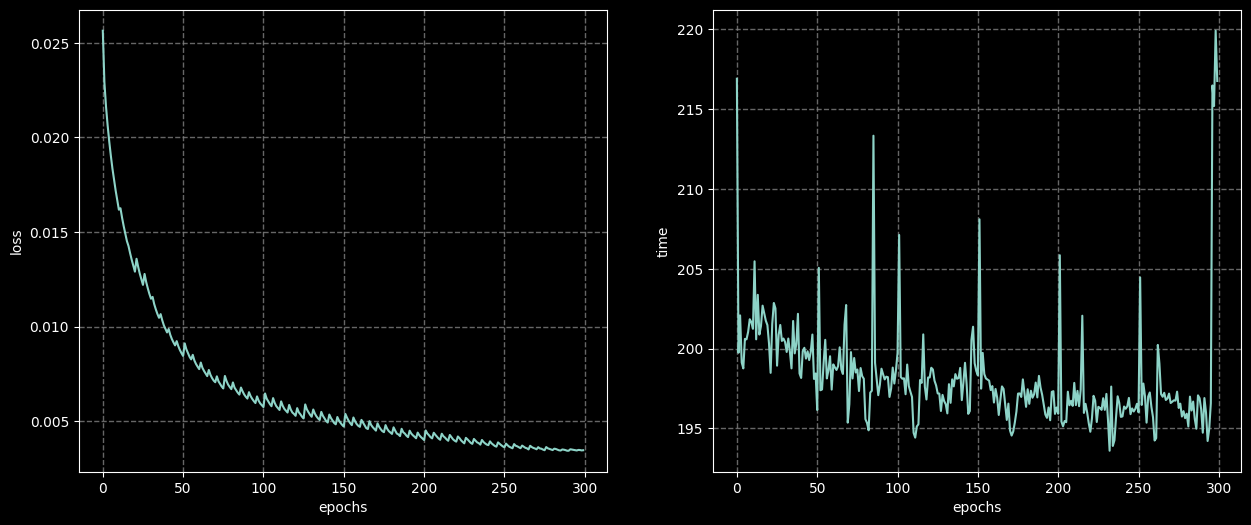

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(stat_dict['Epoch'], stat_dict['loss'])
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].grid(linestyle='--', linewidth=1, color='grey', alpha=0.8)

ax[1].plot(stat_dict['Epoch'], stat_dict['time'])
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("time")
ax[1].grid(linestyle='--', linewidth=1, color='grey', alpha=0.8)

(0.0, 1.0, 0.0, 1.0)

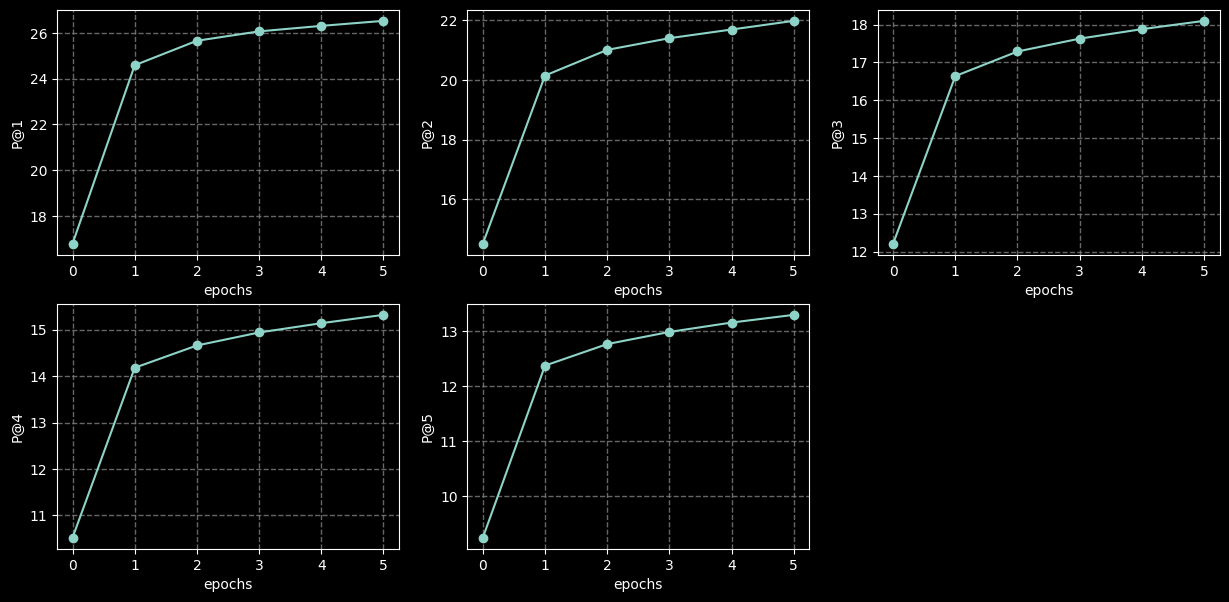

In [167]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))

for i in range(val_metrics.shape[1]):
    r, c = i//3, i%3
    ax[r, c].plot(val_metrics[:, i], 'o-')
    ax[r, c].set_xlabel('epochs')
    ax[r, c].set_ylabel(f'P@{i+1}')
    ax[r, c].grid(linestyle='--', linewidth=1, color='grey', alpha=0.8)
    
ax[1, 2].axis("off")

# Multiple

## Siamese

In [9]:
log_files = [f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_0_100/siamese/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_1_100/siamese/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_2_100/siamese/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_4_100/siamese/log_train.txt"
            ]
legend = ["baseline", "metadata_lbl", "xc", "metadata"]


'''
log_files = [f"{data_dir}/G-LF-WikiTitles-1M/v_0_100/siamese/log_train.txt"]
legend = ["baseline"]
'''

'''
log_files = [f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_0_200/siamese/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_4_200/siamese/log_train.txt"
            ]
legend = ["baseline", "metadata"]
'''

stats = read_log_files(log_files)

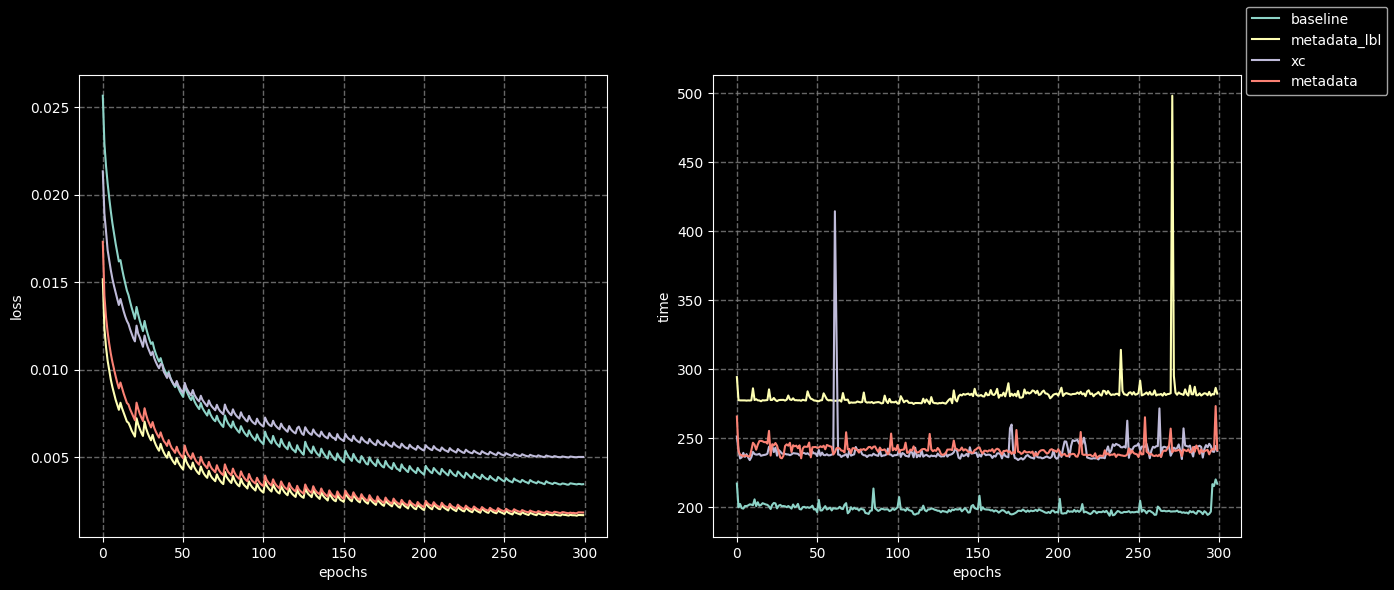

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for stat_dict, _ in stats:
    plot_loss(fig, ax, stat_dict)
fig.legend(legend)
plt.show()

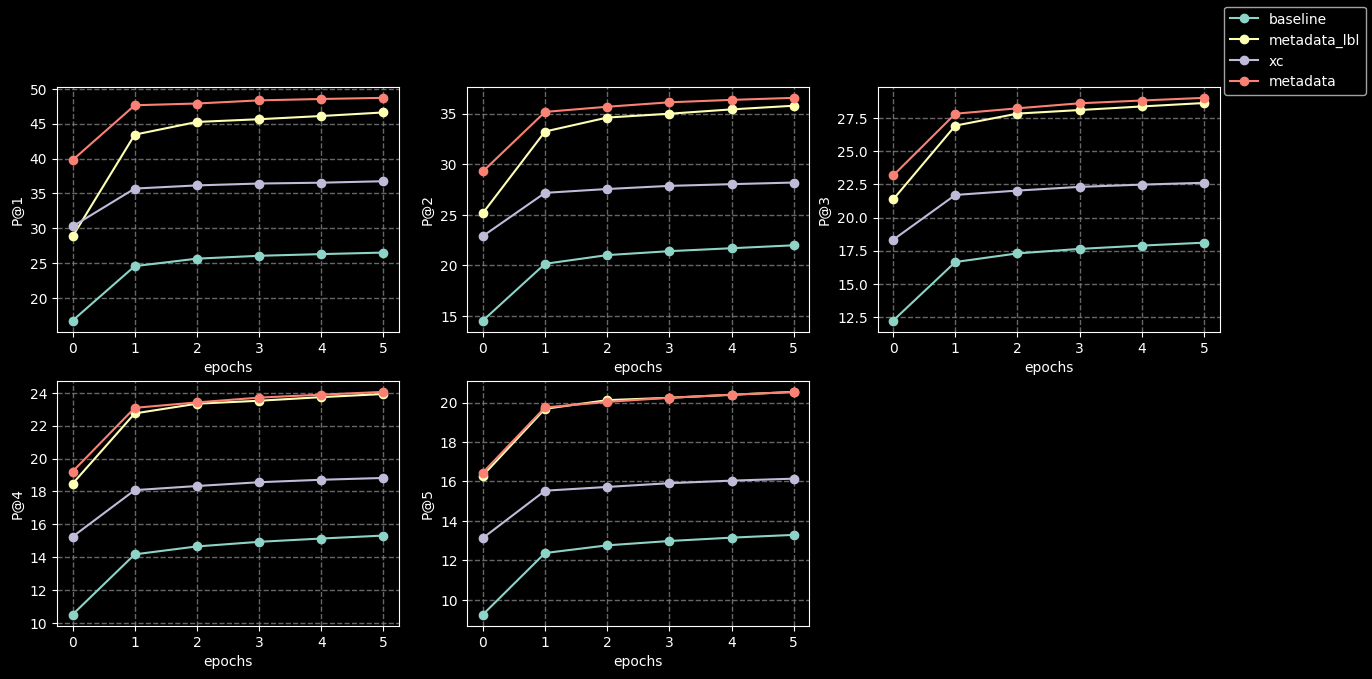

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
for _, val_metrics in stats:
    plot_val(fig, ax, val_metrics)
fig.legend(legend)
plt.show()

## Extreme

In [12]:
log_files = [f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_0_100/extreme/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_1_100/extreme/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_2_100/extreme/log_train.txt",
             f"{data_dir}/G-LF-WikiSeeAlsoTitles-300K/v_4_100/extreme/log_train.txt"
            ]
legend = ["baseline", "metadata_lbl", "xc", "metadata"]

'''
log_files = [f"{data_dir}/G-LF-WikiTitles-1M/v_0_100/extreme/log_train.txt"]
legend = ["baseline"]
'''

stats = read_log_files(log_files)

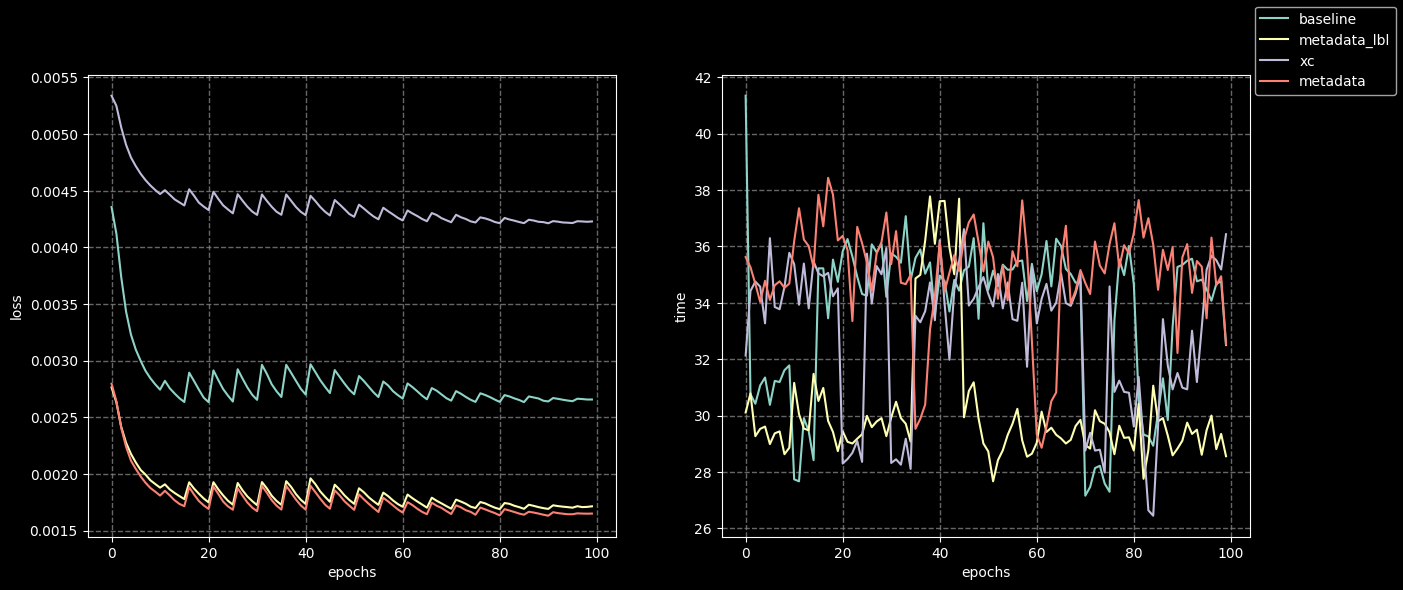

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for stat_dict, _ in stats:
    plot_loss(fig, ax, stat_dict)
fig.legend(legend)
plt.show()

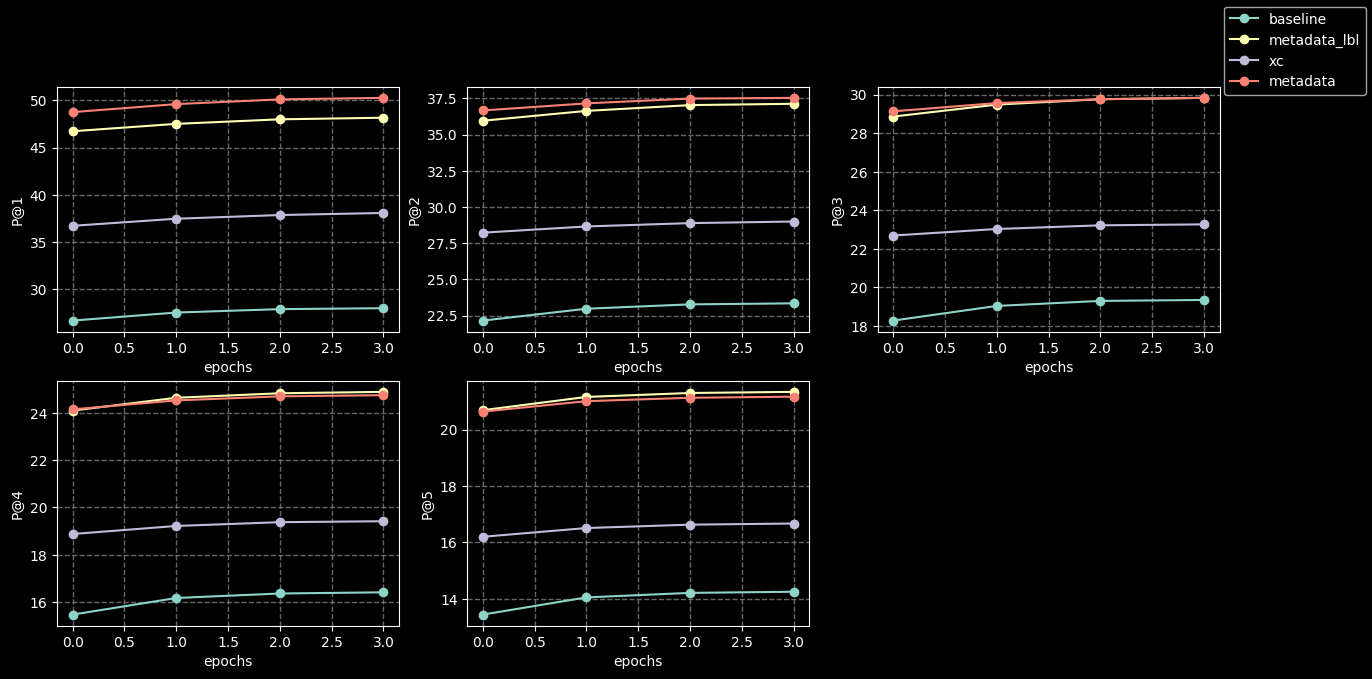

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
for _, val_metrics in stats:
    plot_val(fig, ax, val_metrics)
fig.legend(legend)
plt.show()

# Verify

In [73]:
lbl = np.load("../../../../data/G-LF-WikiSeeAlsoTitles-300K/lbl_input_ids.npy")
lbl_category = np.load("../../../../data/G-LF-WikiSeeAlsoTitles-300K/lbl_category_input_ids.npy")

In [74]:
(lbl > 0).sum(axis=1), (lbl_category > 0).sum(axis=1)

array([4, 5, 6, ..., 4, 4, 8])

In [75]:
trn = np.load("../../../../data/G-LF-WikiSeeAlsoTitles-300K/trn_doc_input_ids.npy")
trn_category = np.load("../../../../data/G-LF-WikiSeeAlsoTitles-300K/trn_category_doc_input_ids.npy")

In [82]:
(trn > 0).sum(axis=1), (trn_category > 0).sum(axis=1)

In [78]:
tst = np.load("../../../../data/G-LF-WikiSeeAlsoTitles-300K/tst_doc_input_ids.npy")
tst_category = np.load("../../../../data/G-LF-WikiSeeAlsoTitles-300K/tst_category_doc_input_ids.npy")

In [80]:
(tst > 0).sum(axis=1), (tst_category > 0).sum(axis=1)